In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings(action="ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_style(style="darkgrid")
%matplotlib inline
df = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\Ecommerce Customers\Ecommerce Customers")

In [2]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


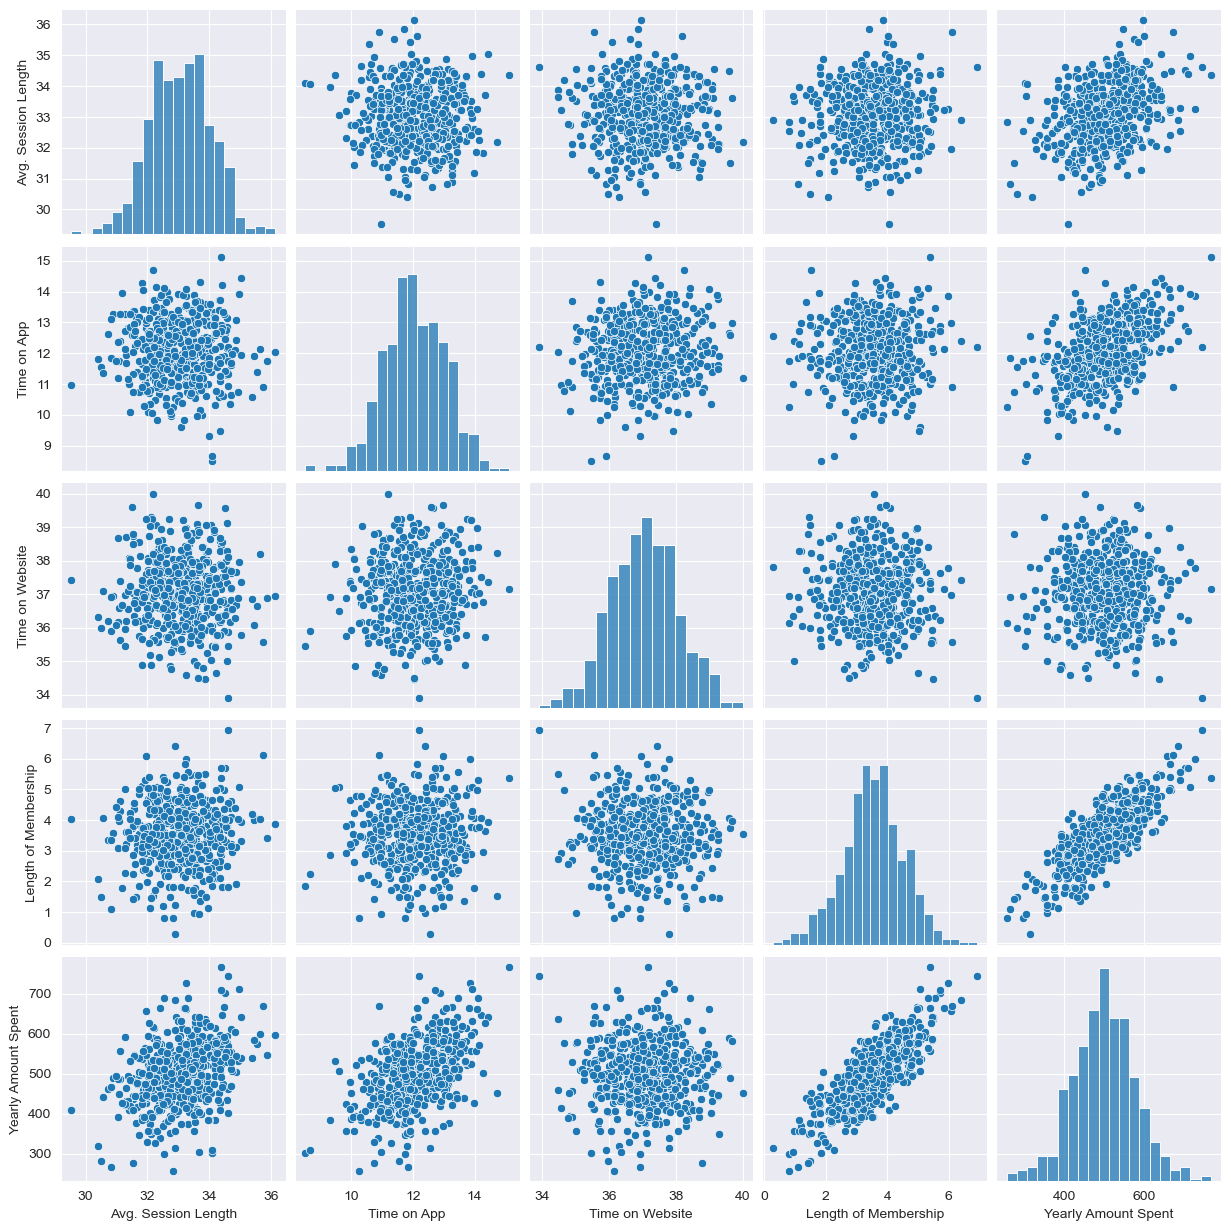

In [3]:
sns.pairplot(data=df)

In [4]:
df[df.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [5]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
import os

numerical = df.select_dtypes(include="number", exclude="object")
X = numerical.iloc[:,:-1]
y = numerical.iloc[:,-1]

const_x = sm.add_constant(X)
model = sm.OLS(endog=y, exog=const_x).fit()

model_vif = pd.DataFrame()
model_vif["features"] = const_x.columns
model_vif["vif"] = [variance_inflation_factor(exog=const_x.values, exog_idx=i) for i in range(const_x.shape[1])]

with open(file=os.path.join(os.getcwd(), "OLS_Result.txt"), mode="w") as file:
    file.write((f"{model.summary()}\n"))
    file.write((f"\nVIF FOR EACH COLUMN\n"))
    file.write((f"{model_vif}\n"))
    

<Axes: >

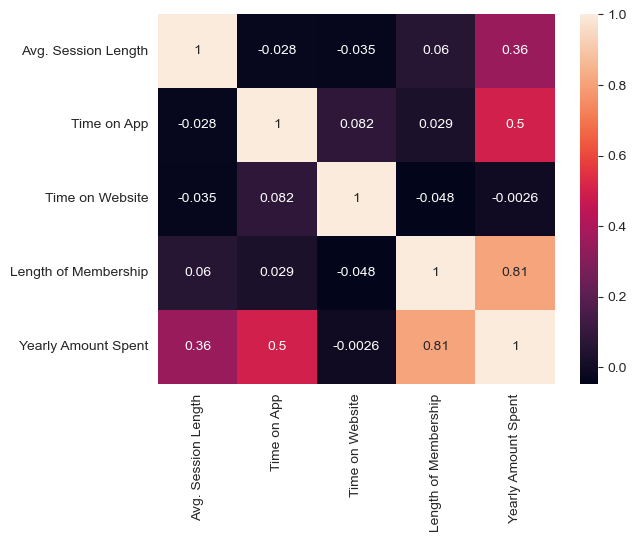

In [8]:
sns.heatmap(data=numerical.corr(), annot=True)

In [9]:
num_df = numerical.copy()

def z_score(column: str, data: pd.DataFrame) -> tuple[float, float]:
    
    mean = np.mean(data[column])
    std = np.std(data[column])
    
    upper_limit = mean + 3 * std
    lower_limit  = mean - 3 * std
    
    return lower_limit, upper_limit


for col in num_df.columns:
    print(f"Column name: {col}")
    
    lower, upper = z_score(column=col, data=num_df)
    
    # Create outlier mask
    outlier_mask = (num_df[col] < lower) | (num_df[col] > upper)
    
    # Use .loc[] to safely set outliers to NaN
    num_df.loc[outlier_mask, col] = np.nan
    
    # Print outliers
    print("Outliers:")
    print(num_df[col][outlier_mask])
    print()
    
num_df.dropna(inplace=True)
num_df.isna().sum()[num_df.isna().sum() > 0]

Column name: Avg. Session Length
Outliers:
12    NaN
154   NaN
Name: Avg. Session Length, dtype: float64

Column name: Time on App
Outliers:
65    NaN
309   NaN
442   NaN
Name: Time on App, dtype: float64

Column name: Time on Website
Outliers:
157   NaN
Name: Time on Website, dtype: float64

Column name: Length of Membership
Outliers:
157   NaN
447   NaN
Name: Length of Membership, dtype: float64

Column name: Yearly Amount Spent
Outliers:
65    NaN
157   NaN
225   NaN
Name: Yearly Amount Spent, dtype: float64



Series([], dtype: int64)

In [10]:
X = num_df.iloc[:,:-1]
X.drop(labels="Time on Website", axis=1, inplace=True)
y = num_df.iloc[:,-1]

const_x = sm.add_constant(X)
model = sm.OLS(endog=y, exog=const_x).fit()

model_vif = pd.DataFrame()
model_vif["features"] = const_x.columns
model_vif["vif"] = [variance_inflation_factor(exog=const_x.values, exog_idx=i) for i in range(const_x.shape[1])]

with open(file=os.path.join(os.getcwd(), "OLS_Result.txt"), mode="a") as file:
    file.write((f"\n\n{model.summary()}\n"))
    file.write((f"\nVIF FOR EACH COLUMN\n"))
    file.write((f"{model_vif}\n"))
    
kf = KFold(n_splits=10, shuffle=True, random_state=15)
cross_val_score(estimator=LinearRegression(), X=X, y=y, cv=kf, n_jobs=-1, scoring="r2").mean()

0.9811339955171814

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.2, random_state=43)
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

y_predict = lr.predict(X=X_test)

print(f"mean absolute error: {mean_absolute_error(y_true=y_test, y_pred=y_predict):.3f}")
print(f"mean squared error: {mean_squared_error(y_true=y_test, y_pred=y_predict):.3f}")
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_predict)):.3f}")
print(f"r2 score: {(r2_score(y_true=y_test, y_pred=y_predict)*100):.2f}%")

mean absolute error: 8.157
mean squared error: 103.258
root mean squared error: 10.162
r2 score: 98.17%
